In [111]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Classification Analysis

In [112]:
# loading dataset

person = pd.read_csv('personality_dataset.csv')

In [113]:
#shape

person.shape

(5000, 8)

In [114]:
#top 5 records
person.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [115]:
#last 5 records
person.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
4995,5,No,6,5,No,14,8,Extrovert
4996,7,No,2,3,Yes,2,5,Introvert
4997,2,No,7,3,No,11,3,Extrovert
4998,2,Yes,9,3,No,15,7,Extrovert
4999,4,Yes,6,7,No,12,3,Extrovert


In [116]:
# info about the dataset

person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           5000 non-null   int64 
 1   Stage_fear                 5000 non-null   object
 2   Social_event_attendance    5000 non-null   int64 
 3   Going_outside              5000 non-null   int64 
 4   Drained_after_socializing  5000 non-null   object
 5   Friends_circle_size        5000 non-null   int64 
 6   Post_frequency             5000 non-null   int64 
 7   Personality                5000 non-null   object
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


In [117]:
person.dtypes.sort_values()

Time_spent_Alone              int64
Social_event_attendance       int64
Going_outside                 int64
Friends_circle_size           int64
Post_frequency                int64
Stage_fear                   object
Drained_after_socializing    object
Personality                  object
dtype: object

In [118]:
# checking missing values

person.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [119]:
# checking duplicates and treating them

person.duplicated().sum()

128

In [120]:
person.drop_duplicates(inplace=True)

In [121]:
person.shape

(4872, 8)

In [122]:
person.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [123]:
# copying the dataset

person_original = person.copy()

In [124]:
person.Going_outside.describe()

count    4872.000000
mean        3.517857
std         2.089579
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Going_outside, dtype: float64

In [125]:
# converting numerical column Going_outside to categorical with 3 categories for bivariate analysis (<=2, 2> and <4, >=4)

person.Going_outside = person.Going_outside.map({0:'<=2',1:'<=2', 2:'<=2', 3:'>2 and <4', 4:'>2 and <4', 5:'>=5', 6:'>=5', 7:'>=5'})



In [126]:
person.Going_outside.value_counts()

Going_outside
>2 and <4    1899
>=5          1500
<=2          1473
Name: count, dtype: int64

In [127]:
person.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,>=5,No,14,5,Extrovert
1,2,No,8,>=5,No,7,8,Extrovert
2,1,No,9,>2 and <4,No,9,3,Extrovert
3,8,No,0,<=2,Yes,9,3,Introvert
4,5,Yes,3,<=2,No,2,6,Introvert


#### 6) univariate analysis

In [128]:
# numerical data (all)

In [129]:
person.dtypes.unique()

# only two datatypes

array([dtype('int64'), dtype('O')], dtype=object)

In [130]:
# numerical undestanding

person.select_dtypes(include = 'int64').describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,4872.0,4.976190,3.038156,0.0,3.0,5.0,7.0,11.0
Social_event_attendance,4872.0,4.993842,2.855725,0.0,3.0,5.0,7.0,10.0
Friends_circle_size,4872.0,7.254310,4.058642,0.0,5.0,7.0,10.0,15.0
Post_frequency,4872.0,4.758621,2.783804,0.0,3.0,5.0,7.0,10.0


In [131]:
person.select_dtypes(include = 'int64').columns

Index(['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

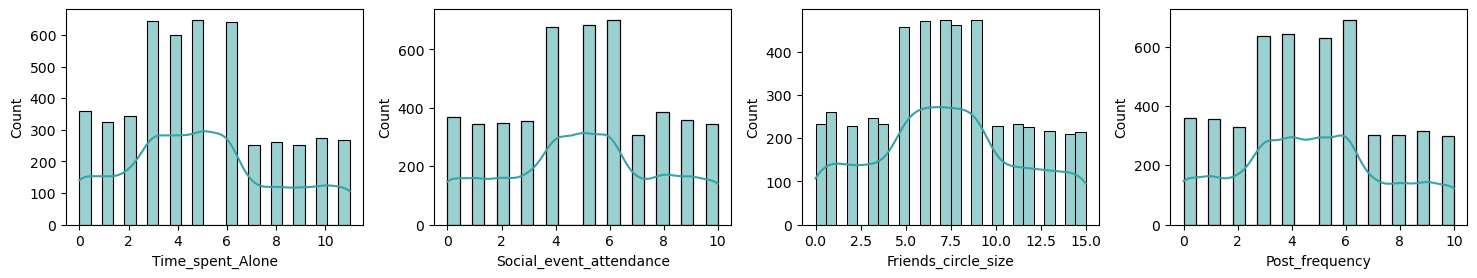

In [132]:
# visual undestanding

fig, axes = plt.subplots(1,4,figsize=(15,3))
axes = axes.flatten()
plt.tight_layout(pad=2)

for index, col in enumerate(list(person.select_dtypes(include = 'int64').columns)):
    sns.histplot(person,x=col, ax=axes[index],kde=True,color='#38a3a5')
    

In [133]:
# numerical data (one-by-one)

In [134]:
person.select_dtypes(include = 'int64').columns

Index(['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

In [135]:
person.Time_spent_Alone.describe()

count    4872.000000
mean        4.976190
std         3.038156
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        11.000000
Name: Time_spent_Alone, dtype: float64

In [136]:
person.Time_spent_Alone.quantile([0,0.01,0.50,0.70,0.90,0.95,0.99,1])

0.00     0.0
0.01     0.0
0.50     5.0
0.70     6.0
0.90    10.0
0.95    11.0
0.99    11.0
1.00    11.0
Name: Time_spent_Alone, dtype: float64

In [137]:
# variation around mean is close to mean value. bit high variance

Text(0.5, 1.0, 'Boxplot of Time_spent_Alone')

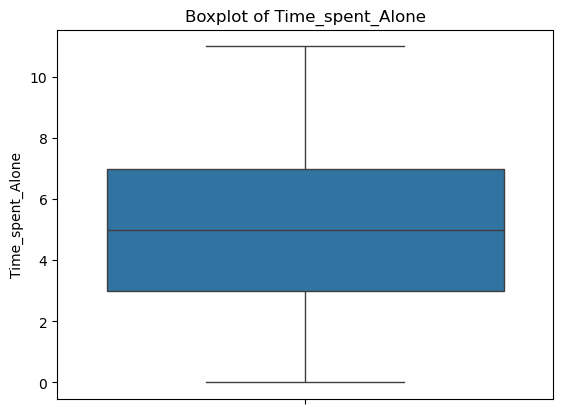

In [138]:
sns.boxplot(person.Time_spent_Alone)
plt.title('Boxplot of Time_spent_Alone')

In [139]:
# no 1D outliers found by boxplot for Time_spent_Alone

In [140]:
person.Time_spent_Alone.agg(['kurt', 'skew'])

kurt   -0.689738
skew    0.293179
Name: Time_spent_Alone, dtype: float64

In [141]:
# flatter peak and slightly positively skewed

In [142]:
person.Social_event_attendance.describe()

count    4872.000000
mean        4.993842
std         2.855725
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Social_event_attendance, dtype: float64

In [143]:
person.Social_event_attendance.quantile([0,0.01,0.50,0.70,0.90,0.95,0.99,1])

0.00     0.0
0.01     0.0
0.50     5.0
0.70     6.0
0.90     9.0
0.95    10.0
0.99    10.0
1.00    10.0
Name: Social_event_attendance, dtype: float64

In [144]:
# data has no extream lower or upper values each quantile values confirms that. variation around the mean is bit high

Text(0.5, 1.0, 'Boxplot of Social_event_attendance')

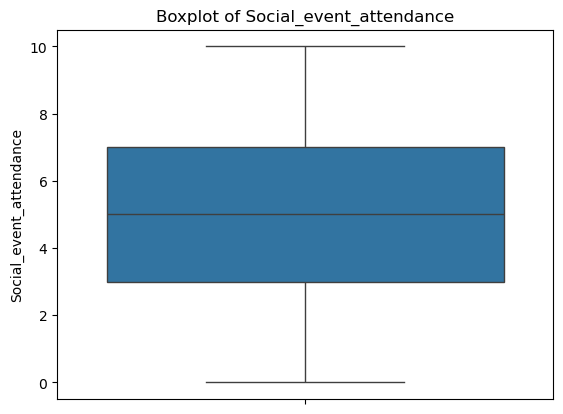

In [145]:
sns.boxplot(person.Social_event_attendance)
plt.title('Boxplot of Social_event_attendance')

In [146]:
# no 1D outliers found by boxplot for Social_event_attendance

In [147]:
person.Social_event_attendance.agg(['kurt', 'skew'])

kurt   -0.845970
skew   -0.007392
Name: Social_event_attendance, dtype: float64

In [148]:
# flatter peak and slightly negativly skewed

In [149]:
person.Friends_circle_size.describe()

count    4872.000000
mean        7.254310
std         4.058642
min         0.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        15.000000
Name: Friends_circle_size, dtype: float64

In [150]:
person.Friends_circle_size.quantile([0,0.01,0.50,0.70,0.90,0.95,0.99,1])

0.00     0.0
0.01     0.0
0.50     7.0
0.70     9.0
0.90    13.0
0.95    14.0
0.99    15.0
1.00    15.0
Name: Friends_circle_size, dtype: float64

In [151]:
# data has no extream lower or upper values each qaurtile values confirms that. variation around the mean also a small value.

Text(0.5, 1.0, 'Boxplot of Friends_circle_size')

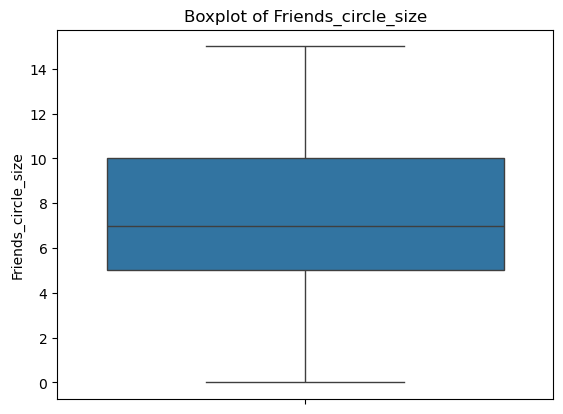

In [152]:
sns.boxplot(person.Friends_circle_size)
plt.title('Boxplot of Friends_circle_size')

In [153]:
# no 1D outliears found by boxplot for Friends_circle_size

In [154]:
person.Friends_circle_size.agg(['kurt', 'skew'])

kurt   -0.756299
skew    0.092758
Name: Friends_circle_size, dtype: float64

In [155]:
# flatter peak and almost no skewness

In [156]:
person.Post_frequency.describe()

count    4872.000000
mean        4.758621
std         2.783804
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Post_frequency, dtype: float64

In [157]:
person.Post_frequency.quantile([0,0.01,0.50,0.70,0.90,0.95,0.99,1])

0.00     0.0
0.01     0.0
0.50     5.0
0.70     6.0
0.90     9.0
0.95    10.0
0.99    10.0
1.00    10.0
Name: Post_frequency, dtype: float64

In [158]:
# data has no extream lower or upper values

Text(0.5, 1.0, 'Boxplot of Post_frequencyFriends_circle_size')

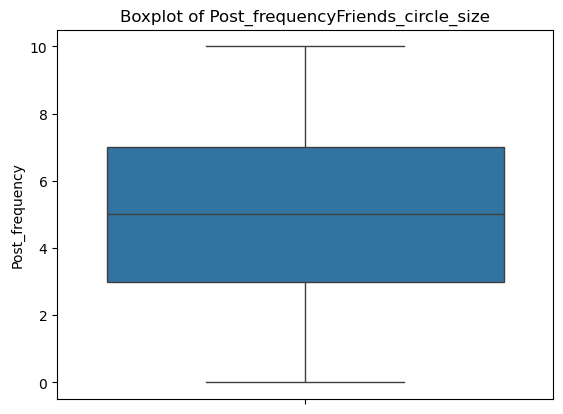

In [159]:
sns.boxplot(person.Post_frequency)
plt.title('Boxplot of Post_frequencyFriends_circle_size')

In [160]:
# no 1D outliears found by boxplot for Post_frequency

In [161]:
person.Post_frequency.agg(['kurt', 'skew'])

kurt   -0.772216
skew    0.129563
Name: Post_frequency, dtype: float64

In [162]:
# flatter peak and slightly positively skewed

In [163]:
# categorical data (all)

In [164]:
person.select_dtypes(include = 'O').describe().T

,count,unique,top,freq
Stage_fear,4872,2,No,2693
Going_outside,4872,3,>2 and <4,1899
Drained_after_socializing,4872,2,Yes,2687
Personality,4872,2,Introvert,2440


In [165]:
person.select_dtypes(include = 'O').columns

Index(['Stage_fear', 'Going_outside', 'Drained_after_socializing',
       'Personality'],
      dtype='object')

In [166]:
import researchpy as rp

rp.summary_cat(person.select_dtypes(include = 'O'))

,Variable,Outcome,Count,Percent
0,Stage_fear,No,2693,55.28
1,,Yes,2179,44.72
2,Going_outside,>2 and <4,1899,38.98
3,,>=5,1500,30.79
4,,<=2,1473,30.23
5,Drained_after_socializing,Yes,2687,55.15
6,,No,2185,44.85
7,Personality,Introvert,2440,50.08
8,,Extrovert,2432,49.92


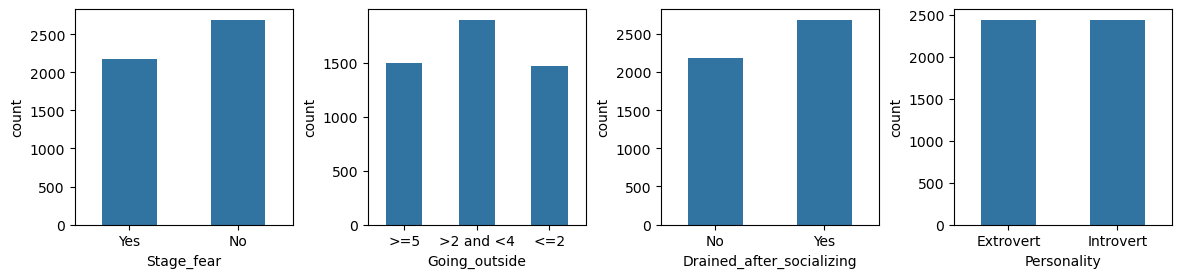

In [167]:
# visual undestanding

fig, axes = plt.subplots(1,4,figsize=(12,3))
axes = axes.flatten()
plt.tight_layout(pad=2.0)

for index, col in enumerate(list(person.select_dtypes(include = 'O').columns)):
    sns.countplot(person,x=col, ax=axes[index], width=0.5)
    

In [168]:
# more info about numerical data
rp.summary_cont(person.select_dtypes(include = 'int64'))

C:\Users\User\anaconda3\Lib\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Time_spent_Alone' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
C:\Users\User\anaconda3\Lib\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Social_event_attendance' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
C:\Users\User\anaconda3\Lib\site-packages\researchpy\summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Friends_circle_size' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Time_spent_Alone,4872.0,4.9762,3.0382,0.0435,4.8909,5.0615
1,Social_event_attendance,4872.0,4.9938,2.8557,0.0409,4.9136,5.0741
2,Friends_circle_size,4872.0,7.2543,4.0586,0.0581,7.1403,7.3683
3,Post_frequency,4872.0,4.7586,2.7838,0.0399,4.6804,4.8368


In [169]:
# categorical data ( one - by - one)

In [170]:
person.select_dtypes(include = 'O').columns

Index(['Stage_fear', 'Going_outside', 'Drained_after_socializing',
       'Personality'],
      dtype='object')

In [171]:
person.Stage_fear.value_counts()

Stage_fear
No     2693
Yes    2179
Name: count, dtype: int64

In [172]:
person.Stage_fear.value_counts(normalize=True)

Stage_fear
No     0.55275
Yes    0.44725
Name: proportion, dtype: float64

In [173]:
# more than half of obeseravations do not have stage fear

In [174]:
# visual

In [175]:
a = person.groupby(by=['Stage_fear']).size()

Text(0.5, 1.0, 'pie chart of Stage_fear')

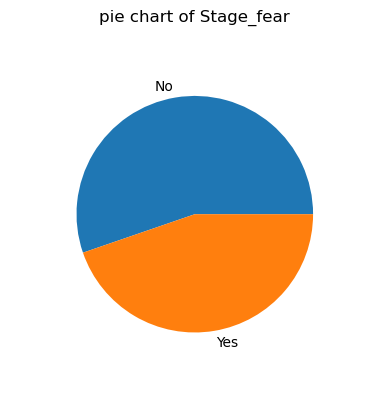

In [176]:
plt.pie(data = a, x=a.values, labels=['No', 'Yes'], radius=0.8)
plt.title('pie chart of Stage_fear')

In [177]:
person.Going_outside.value_counts()

Going_outside
>2 and <4    1899
>=5          1500
<=2          1473
Name: count, dtype: int64

In [178]:
person.Going_outside.value_counts(normalize=True)

Going_outside
>2 and <4    0.389778
>=5          0.307882
<=2          0.302340
Name: proportion, dtype: float64

In [179]:
# 43% of people go outside 3 to 4 times week

In [180]:
# visual

Text(0.5, 1.0, 'Bar chart of Going_outside')

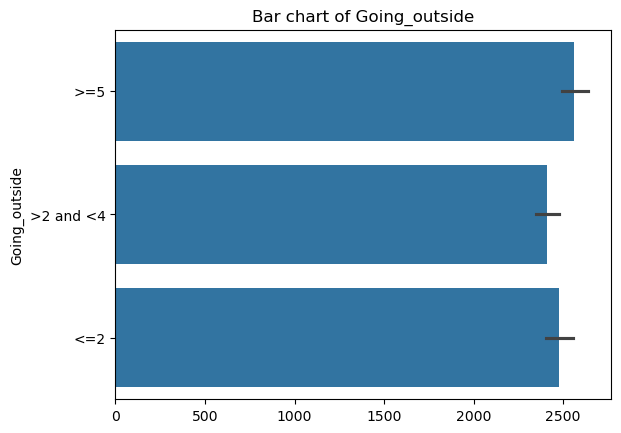

In [181]:
sns.barplot(person.Going_outside)
plt.title('Bar chart of Going_outside')

In [182]:
person.Drained_after_socializing.value_counts()

Drained_after_socializing
Yes    2687
No     2185
Name: count, dtype: int64

In [183]:
person.Drained_after_socializing.value_counts(normalize=True)

Drained_after_socializing
Yes    0.551519
No     0.448481
Name: proportion, dtype: float64

In [184]:
# all categorize approximelty have same percentage

In [185]:
# visual

In [186]:
b = person.groupby(by=['Drained_after_socializing']).size()

Text(0.5, 1.0, 'pie chart of Drained_after_socializing')

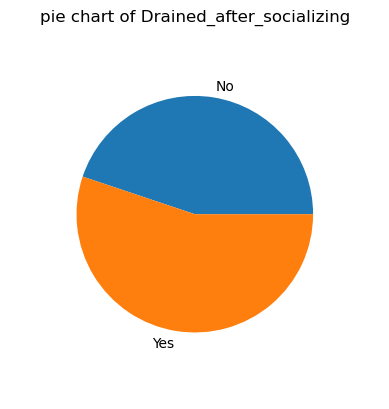

In [187]:
plt.pie(data = b, x=b.values, labels=['No', 'Yes'], radius=0.8)
plt.title('pie chart of Drained_after_socializing')

In [188]:
person.Personality.value_counts()

Personality
Introvert    2440
Extrovert    2432
Name: count, dtype: int64

In [189]:
person.Personality.value_counts(normalize=True)

Personality
Introvert    0.500821
Extrovert    0.499179
Name: proportion, dtype: float64

In [190]:
# all categorize approximelty have same percentage

In [191]:
# visual

In [192]:
c = person.groupby(by=['Personality']).size()

In [193]:
c

Personality
Extrovert    2432
Introvert    2440
dtype: int64

Text(0.5, 1.0, 'pie chart of Personality')

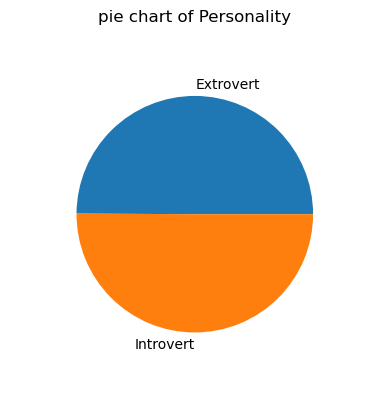

In [194]:
plt.pie(data = c, x=c.values, labels=['Extrovert', 'Introvert'], radius=0.8)
plt.title('pie chart of Personality')

#### 8) Bi-variate analysis

In [195]:
# correaltion

In [196]:
# checking correlation between 'Time_spent_Alone' and 'Friends_circle_size'

person.Time_spent_Alone.corr(person.Friends_circle_size)

# I can say there is a medium negative correlation which means when friend circle descreses time that spend along increases

-0.4208978678562561

<Axes: xlabel='Time_spent_Alone', ylabel='Friends_circle_size'>

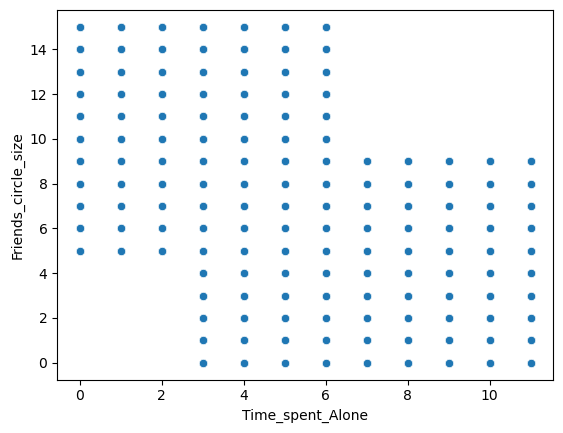

In [197]:
# 'Time_spent_Alone' and 'Friends_circle_size'

# check the scatter plot

sns.scatterplot(data = person, x = 'Time_spent_Alone', y = 'Friends_circle_size')


In [198]:
#chi_square test

<Axes: xlabel='Personality'>

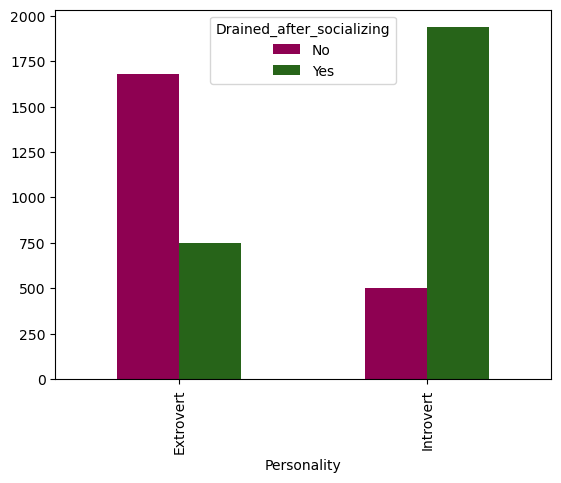

In [199]:
# grouped bar plot for 'Personality' and 'Drained_after_socializing'
pd.crosstab(person.Personality, person.Drained_after_socializing).plot(kind='bar',colormap='PiYG')

In [200]:
pd.crosstab(person.Personality, person.Drained_after_socializing, margins=True)

Drained_after_socializing,No,Yes,All
Personality,,,
Extrovert,1682,750,2432
Introvert,503,1937,2440
All,2185,2687,4872


In [201]:
(pd.crosstab(person.Personality, person.Drained_after_socializing, margins=True)<5).sum()

# all cell frequencies are greater than 5
# total obs greater than 50
# variables are mutually exclusinve

# so i can perform Chi_square test for independency


Drained_after_socializing
No     0
Yes    0
All    0
dtype: int64

In [202]:
from scipy.stats import chi2_contingency

In [203]:
stat, pval, dof, expfreq = chi2_contingency(pd.crosstab(person.Personality, person.Drained_after_socializing))

In [204]:
pval

# since p value less than 0.05 i can reject null hypothesis, 
# it confirms that there is an association between Drained_after_socializing and personality

6.1638169777140416e-254

In [205]:
expfreq

array([[1090.70607553, 1341.29392447],
       [1094.29392447, 1345.70607553]])

#### 9) colinearity and multicolinearity

<Axes: >

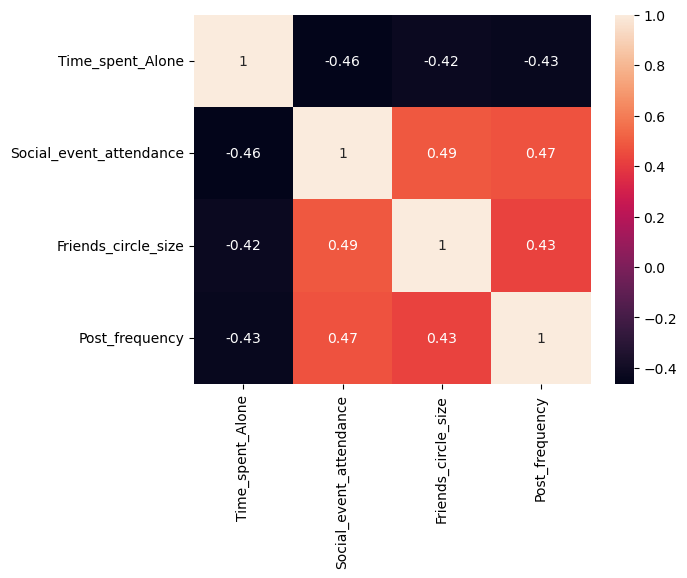

In [206]:
# colinearity

sns.heatmap(person.corr(numeric_only=True), annot=True)

In [207]:
# since no corrleation between any group that is greater than 0.7 no need to remove colinearity.

#### 10) Encording data

In [208]:
X = person.drop(columns=['Personality'])
y = person.Personality

X_scaled_raw = pd.get_dummies(X, columns=X.select_dtypes(include=['O']).columns, drop_first=True)

In [209]:
X_scaled_raw.shape, y.shape

((4872, 8), (4872,))

#### 7) Outlier detection and removal

In [210]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
label = lof.fit_predict(X_scaled_raw)


In [211]:
np.unique(label)

array([1])

In [212]:
# no outliears according to lof default model

#### 11) Train test split


In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X_scaled_raw, y,test_size=0.3, random_state=0)

In [214]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3410, 8), (1462, 8), (3410,), (1462,))

#### 12) Scaling

In [215]:
from sklearn.preprocessing import StandardScaler

In [216]:
X_train

,Time_spent_Alone,Social_event_attendance,Friends_circle_size,Post_frequency,Stage_fear_Yes,Going_outside_>2 and <4,Going_outside_>=5,Drained_after_socializing_Yes
4867,5,6,14,8,False,False,True,False
4808,0,5,7,7,False,False,True,False
149,4,6,6,4,True,True,False,True
4508,3,6,5,4,True,True,False,False
2923,1,10,13,4,False,False,True,False
...,...,...,...,...,...,...,...,...
4985,2,8,6,9,False,True,False,False
3324,0,8,15,5,True,False,True,False
1671,11,1,9,5,True,True,False,False
2645,4,10,12,3,False,False,True,False


In [217]:
scale = StandardScaler()

X_train_1 = scale.fit_transform(X_train)
X_test_1 = scale.transform(X_test)

X_train_sc = pd.DataFrame(X_train_1, columns=X_train.columns, index = X_train.index)
X_test_sc = pd.DataFrame(X_test_1, columns=X_test.columns, index = X_test.index)

In [218]:
X_train_sc.shape, X_test_sc.shape

((3410, 8), (1462, 8))

In [219]:
X_train_sc.head()

,Time_spent_Alone,Social_event_attendance,Friends_circle_size,Post_frequency,Stage_fear_Yes,Going_outside_>2 and <4,Going_outside_>=5,Drained_after_socializing_Yes
4867,-0.002610,0.347509,1.666338,1.180486,-0.897855,-0.801119,1.499206,-1.109151
4808,-1.651041,-0.001844,-0.055768,0.817832,-0.897855,-0.801119,1.499206,-1.109151
149,-0.332297,0.347509,-0.301783,-0.270129,1.113765,1.248255,-0.667020,0.901591
4508,-0.661983,0.347509,-0.547799,-0.270129,1.113765,1.248255,-0.667020,-1.109151
2923,-1.321355,1.744922,1.420323,-0.270129,-0.897855,-0.801119,1.499206,-1.109151


#### 9) multicolinearity

In [220]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vifval(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    topval = vif.head(1)
    return topval

In [221]:
vifval(X_train_sc)

,Features,VIF
6,Going_outside_>=5,2.67


In [222]:
# top vif value is 2.67 so we dont have to remove multicolinerity since the highest value is less than 10

#### 13) PCA

In [223]:
from sklearn.decomposition import PCA

In [224]:
pca = PCA(n_components=X_train_sc.shape[1])
X_pca_train = pca.fit_transform(X_train_sc)
X_pca_test = pca.transform(X_test_sc)

In [225]:
pca.components_

array([[-0.38300813,  0.41702783,  0.39216634,  0.38255697, -0.31902702,
        -0.11044901,  0.41367759, -0.30682554],
       [-0.13076928,  0.11094429,  0.11986096,  0.14118706, -0.14366699,
         0.82878492, -0.46104344, -0.12729735],
       [-0.07376421,  0.05279378,  0.07304253,  0.02230469, -0.52419443,
         0.0128576 ,  0.01311863,  0.84310244],
       [-0.27129269,  0.16787049,  0.15027274,  0.35605101,  0.75803404,
         0.05498006,  0.01388012,  0.41356315],
       [ 0.69996549,  0.17587923,  0.68173803, -0.0703042 ,  0.08378592,
         0.01731569, -0.0079065 ,  0.04497735],
       [ 0.46666262, -0.00932916, -0.37976563,  0.78807046, -0.11312287,
        -0.0480775 , -0.03889193, -0.01552968],
       [ 0.15795073,  0.84716741, -0.41907789, -0.27257382,  0.05552513,
         0.04796193,  0.02514649,  0.03768882],
       [ 0.15649017, -0.18465726, -0.13894907, -0.07843683,  0.07270656,
         0.54112551,  0.78341407,  0.06413017]])

In [226]:
pca_df_x_train = pd.DataFrame(data=pca.components_, columns=X_train_sc.columns)

In [227]:
pca.explained_variance_ratio_

array([0.41792128, 0.16031529, 0.09482085, 0.08931013, 0.07364226,
       0.07107072, 0.06160297, 0.03131651])

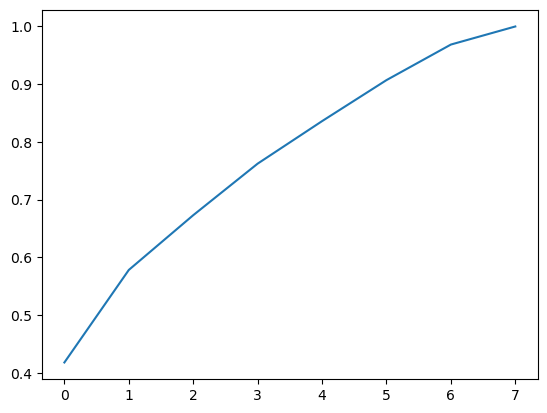

In [228]:
cm_exp_variance = []
s = 0
for i in pca.explained_variance_ratio_:
    s += i
    cm_exp_variance.append(s)

plt.plot(range(X_train_sc.shape[1]), cm_exp_variance)

#### 14) Classification Models

##### Logistic Regression

In [229]:
X_train_sc.head()

,Time_spent_Alone,Social_event_attendance,Friends_circle_size,Post_frequency,Stage_fear_Yes,Going_outside_>2 and <4,Going_outside_>=5,Drained_after_socializing_Yes
4867,-0.002610,0.347509,1.666338,1.180486,-0.897855,-0.801119,1.499206,-1.109151
4808,-1.651041,-0.001844,-0.055768,0.817832,-0.897855,-0.801119,1.499206,-1.109151
149,-0.332297,0.347509,-0.301783,-0.270129,1.113765,1.248255,-0.667020,0.901591
4508,-0.661983,0.347509,-0.547799,-0.270129,1.113765,1.248255,-0.667020,-1.109151
2923,-1.321355,1.744922,1.420323,-0.270129,-0.897855,-0.801119,1.499206,-1.109151


In [230]:
y_train.head()

4867    Extrovert
4808    Extrovert
149     Introvert
4508    Introvert
2923    Extrovert
Name: Personality, dtype: object

In [231]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model = lr.fit(X_train_sc, y_train)

In [232]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, roc_auc_score, roc_curve, f1_score

In [233]:
# Accuracy score

acc_train = accuracy_score(y_train, model.predict(X_train_sc))
acc_test = accuracy_score(y_test, model.predict(X_test_sc))

print(f'accuracy score for train set, {acc_train}')
print(f'accuracy score for test set, {acc_test}')

print('-'*100)

# macro recall

recall_train = recall_score(y_train, model.predict(X_train_sc), pos_label='Extrovert')
recall_test = recall_score(y_test, model.predict(X_test_sc), pos_label='Extrovert')

print(f'recall_score score for train set, {recall_train}')
print(f'recall_score for test set, {recall_test}')

print('-'*100)

# macro precision

prec_train = precision_score(y_train, model.predict(X_train_sc), pos_label='Extrovert')
prec_test = precision_score(y_test, model.predict(X_test_sc), pos_label='Extrovert')

print(f'precision_score for train set, {prec_train}')
print(f'precision_score for test set, {prec_test}')

print('-'*100)

# f1_score

f1_train = f1_score(y_train, model.predict(X_train_sc), pos_label='Extrovert')
f1_test = f1_score(y_test, model.predict(X_test_sc), pos_label='Extrovert')

print(f'f1_score for train set, {f1_train}')
print(f'f1_score for test set, {f1_test}')

print('-'*100)

# classification_report

class_train = classification_report(y_train, model.predict(X_train_sc))
class_test = classification_report(y_test, model.predict(X_test_sc))

print('classification_report for train set,')
print(class_train)
print('-'*100)
print('classification_report for test set,')
print(class_test)

print('-'*100)

# Confusion matrix

conf_train = confusion_matrix(y_train, model.predict(X_train_sc))
conf_test = confusion_matrix(y_test, model.predict(X_test_sc))

print('confusion_matrix for train set,')
print(conf_train)
print('-'*100)
print('confusion_matrix for test set,')
print(conf_test)

accuracy score for train set, 0.9903225806451613
accuracy score for test set, 0.9904240766073872
----------------------------------------------------------------------------------------------------
recall_score score for train set, 0.9917840375586855
recall_score for test set, 0.9917582417582418
----------------------------------------------------------------------------------------------------
precision_score for train set, 0.9888823873610298
precision_score for test set, 0.989041095890411
----------------------------------------------------------------------------------------------------
f1_score for train set, 0.9903310870202168
f1_score for test set, 0.99039780521262
----------------------------------------------------------------------------------------------------
classification_report for train set,
              precision    recall  f1-score   support

   Extrovert       0.99      0.99      0.99      1704
   Introvert       0.99      0.99      0.99      1706

    accuracy      

In [234]:
# all accuracy_score, recall_score, precision_score and f1_score for both train and test sets have 0.99 score. so i can say no overfitting of model

In [235]:
# crossvalscore

from sklearn.model_selection import cross_val_score

csscorea = cross_val_score(lr, X_train_sc, y_train,scoring='accuracy', cv=5).mean()
print(f'accuracy cross val score :, {csscorea}')
print('-'*100)
csscoref = cross_val_score(lr, X_train_sc, y_train,scoring='f1_macro', cv=5).mean()
print(f'f1 cross val score :, {csscoref}')

accuracy cross val score :, 0.9888563049853373
----------------------------------------------------------------------------------------------------
f1 cross val score :, 0.9888562053664467


In [236]:
# hyper param tuning

# checking different penalty, C, solver and l1_ratio

In [237]:
#LogisticRegression?

,C level,crossval,f1testscore
0,0.00001,0.977123,0.990398
1,0.00100,0.981524,0.990398
2,0.10000,0.988563,0.990398
3,1.00000,0.988856,0.990398
4,10.00000,0.989149,0.990398
5,100.00000,0.989149,0.990398
6,1000.00000,0.988856,0.990398


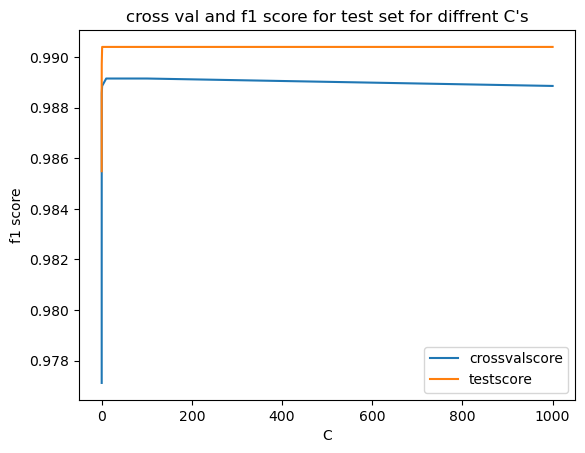

In [238]:
#C

crossvalscore = []
testscore = []

for i in [10**-5, 10**-3, 10**-1, 1, 10, 100, 1000]:
    
    #cross val
    lr = LogisticRegression(C=i)
    csscore = cross_val_score(lr, X_train_sc, y_train,scoring='f1_macro', cv=5).mean()
    crossvalscore.append(csscore)

    #test f1 score
    model1 = lr.fit(X_train_sc, y_train)
    f1scoretest = f1_score(y_test, model1.predict(X_test_sc), pos_label='Extrovert')
    testscore.append(f1scoretest)

plt.plot([10**-5, 10**-3, 10**-1, 1, 10, 100, 1000], crossvalscore, label='crossvalscore')
plt.plot([10**-5, 10**-3, 10**-1, 1, 10, 100, 1000], testscore, label='testscore')
plt.legend()
plt.title("cross val and f1 score for test set for diffrent C's")
plt.xlabel('C')
plt.ylabel('f1 score')

df = pd.DataFrame({'C level':[10**-5, 10**-3, 10**-1, 1, 10, 100, 1000],
                   'crossval':crossvalscore,
                   'f1testscore':f1scoretest})
df


    

In [239]:
# based on the result im gonna choose 10 to 100 for gridsearch

In [240]:
#LogisticRegression?

In [241]:
# grid search

from sklearn.model_selection import GridSearchCV

param = {'C':list(range(10,100,10)),
         'penalty':['l1', 'l2'],
         'solver':['liblinear', 'saga']
         }

model1 = GridSearchCV(LogisticRegression(),
                     param_grid=param,
                     scoring='accuracy',
                     n_jobs=-1)
                     
                     

In [242]:
model1.fit(X_train_sc, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [10, 20, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [243]:
model1.best_score_

0.9891495601173019

In [244]:
model1.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [245]:
actrainbm1 = accuracy_score(y_train, model1.best_estimator_.predict(X_train_sc))
actestbm1 = accuracy_score(y_test, model1.best_estimator_.predict(X_test_sc))
f1trainbm1 = f1_score(y_train, model1.best_estimator_.predict(X_train_sc), pos_label='Extrovert')
f1testbm1 = f1_score(y_test, model1.best_estimator_.predict(X_test_sc), pos_label='Extrovert')

print('new model accuracy score train set - ',actrainbm1)
print('new model accuracy score test set - ',actestbm1)
print('new model f1 score train set - ',f1trainbm1)
print('new model f1 score test set - ',f1testbm1)

new model accuracy score train set -  0.9906158357771261
new model accuracy score test set -  0.9904240766073872
new model f1 score train set -  0.9906213364595545
new model f1 score test set -  0.99039780521262


Text(0.5, 1.0, 'Confusion Matrix Logistic Reg')

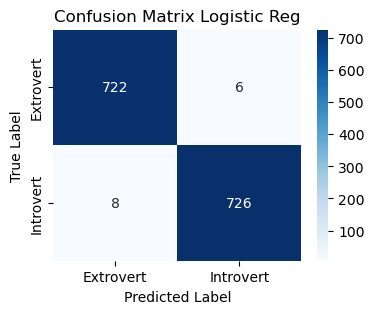

In [246]:
conf_test1 = confusion_matrix(y_test, model1.best_estimator_.predict(X_test_sc))

plt.figure(figsize=(4, 3))
sns.heatmap(conf_test1, annot=True, cmap='Blues', xticklabels=['Extrovert', 'Introvert'], yticklabels=['Extrovert', 'Introvert'], fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Logistic Reg')

In [247]:
# grid search 2

from sklearn.model_selection import GridSearchCV

param = {'C':list(range(10,100,10)),
         'penalty':['elasticnet'],
         'solver':['saga'],
         'l1_ratio':list(np.arange(0.1, 1, 0.1))}
         

model2 = GridSearchCV(LogisticRegression(),
                     param_grid=param,
                     scoring='accuracy',
                     n_jobs=-1)

In [248]:
model2.fit(X_train_sc, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [10, 20, ...], 'l1_ratio': [0.1, 0.2, ...], 'penalty': ['elasticnet'], 'solver': ['saga']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'elasticnet'


In [249]:
model2.best_score_

0.9891495601173019

In [250]:
model2.best_params_

{'C': 10, 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}

In [251]:
actrainbm2 = accuracy_score(y_train, model2.best_estimator_.predict(X_train_sc))
actestbm2 = accuracy_score(y_test, model2.best_estimator_.predict(X_test_sc))
f1trainbm2 = f1_score(y_train, model2.best_estimator_.predict(X_train_sc), pos_label='Extrovert')
f1testbm2 = f1_score(y_test, model2.best_estimator_.predict(X_test_sc), pos_label='Extrovert')

print('new model accuracy score train set - ',actrainbm2)
print('new model accuracy score test set - ',actestbm2)
print('new model f1 score train set - ',f1trainbm2)
print('new model f1 score test set - ',f1testbm2)

new model accuracy score train set -  0.9906158357771261
new model accuracy score test set -  0.9904240766073872
new model f1 score train set -  0.9906213364595545
new model f1 score test set -  0.99039780521262


In [252]:
print(actrainbm2 == actrainbm1, actestbm2==actestbm1, f1trainbm2==f1trainbm1, f1testbm2==f1testbm1)

True True True True


In [253]:
# both {'C': 10, 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'} and  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
# combinations give same train and test accuracy so i can go with either one

##### KNN

In [254]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model = knn.fit(X_train_sc, y_train)

In [255]:
# Accuracy score

acc_train = accuracy_score(y_train, model.predict(X_train_sc))
acc_test = accuracy_score(y_test, model.predict(X_test_sc))

print(f'accuracy score for train set, {acc_train}')
print(f'accuracy score for test set, {acc_test}')

print('-'*100)

# macro recall

recall_train = recall_score(y_train, model.predict(X_train_sc), pos_label='Extrovert')
recall_test = recall_score(y_test, model.predict(X_test_sc), pos_label='Extrovert')

print(f'recall_score score for train set, {recall_train}')
print(f'recall_score for test set, {recall_test}')

print('-'*100)

# macro precision

prec_train = precision_score(y_train, model.predict(X_train_sc), pos_label='Extrovert')
prec_test = precision_score(y_test, model.predict(X_test_sc), pos_label='Extrovert')

print(f'precision_score for train set, {prec_train}')
print(f'precision_score for test set, {prec_test}')

print('-'*100)

# f1_score

f1_train = f1_score(y_train, model.predict(X_train_sc), pos_label='Extrovert')
f1_test = f1_score(y_test, model.predict(X_test_sc), pos_label='Extrovert')

print(f'f1_score for train set, {f1_train}')
print(f'f1_score for test set, {f1_test}')

print('-'*100)

# classification_report

class_train = classification_report(y_train, model.predict(X_train_sc))
class_test = classification_report(y_test, model.predict(X_test_sc))

print('classification_report for train set,')
print(class_train)
print('-'*100)
print('classification_report for test set,')
print(class_test)

print('-'*100)

# Confusion matrix

conf_train = confusion_matrix(y_train, model.predict(X_train_sc))
conf_test = confusion_matrix(y_test, model.predict(X_test_sc))

print('confusion_matrix for train set,')
print(conf_train)
print('-'*100)
print('confusion_matrix for test set,')
print(conf_test)

accuracy score for train set, 0.992375366568915
accuracy score for test set, 0.9911080711354309
----------------------------------------------------------------------------------------------------
recall_score score for train set, 0.9935446009389671
recall_score for test set, 0.9931318681318682
----------------------------------------------------------------------------------------------------
precision_score for train set, 0.9912177985948478
precision_score for test set, 0.9890560875512996
----------------------------------------------------------------------------------------------------
f1_score for train set, 0.9923798358733881
f1_score for test set, 0.9910897875257025
----------------------------------------------------------------------------------------------------
classification_report for train set,
              precision    recall  f1-score   support

   Extrovert       0.99      0.99      0.99      1704
   Introvert       0.99      0.99      0.99      1706

    accuracy    

Text(0.5, 1.0, 'Confusion Matrix KNN')

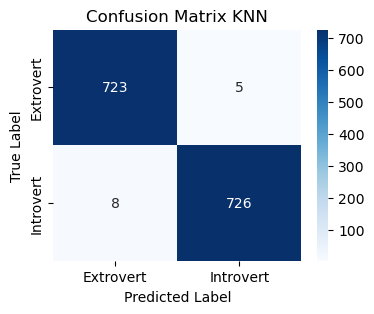

In [256]:
# confusion matrix test set visual

plt.figure(figsize=(4, 3))
sns.heatmap(conf_test, annot=True, cmap='Blues', xticklabels=['Extrovert', 'Introvert'], yticklabels=['Extrovert', 'Introvert'], fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix KNN')

In [257]:
# crossvalscore

from sklearn.model_selection import cross_val_score

csscorea = cross_val_score(knn, X_train_sc, y_train,scoring='accuracy', cv=5).mean()
print(f'accuracy cross val score :, {csscorea}')
print('-'*100)
csscoref = cross_val_score(knn, X_train_sc, y_train,scoring='f1_macro', cv=5).mean()
print(f'f1 cross val score :, {csscoref}')

accuracy cross val score :, 0.9873900293255133
----------------------------------------------------------------------------------------------------
f1 cross val score :, 0.9873896049844957


In [258]:
# since both train and test score are roughly equal i can say there is no overfitting

In [259]:
#KNeighborsClassifier?

In [260]:
# hyper param tuning

# checking different n_neighbors/weights/p

Text(0, 0.5, 'f1 score')

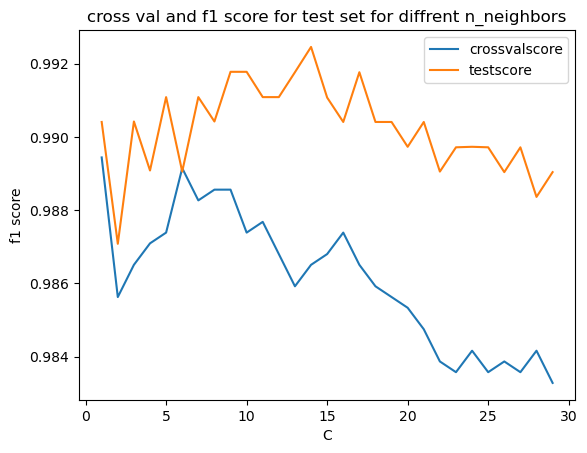

In [261]:
#n_neighbors

crossvalscore = []
testscore = []

for i in range(1,30):
    
    #cross val
    knn = KNeighborsClassifier(n_neighbors=i)
    csscore = cross_val_score(knn, X_train_sc, y_train,scoring='f1_macro', cv=5).mean()
    crossvalscore.append(csscore)

    #test r2 score
    model1 = knn.fit(X_train_sc, y_train)
    f1scoretest = f1_score(y_test, model1.predict(X_test_sc), pos_label='Extrovert')
    testscore.append(f1scoretest)

plt.plot(range(1,30), crossvalscore, label='crossvalscore')
plt.plot(range(1,30), testscore, label='testscore')
plt.legend()
plt.title("cross val and f1 score for test set for diffrent n_neighbors")
plt.xlabel('C')
plt.ylabel('f1 score')



    

In [262]:
# im gonna go with 5 to 17 for gridsearch

In [263]:
#KNeighborsClassifier?

In [264]:
# grid search

from sklearn.model_selection import GridSearchCV

param = {'n_neighbors':list(range(5,18)),
         'weights':['uniform', 'distance'],
         'p':[1, 2, 3]}

model1 = GridSearchCV(KNeighborsClassifier(),
                     param_grid=param,
                     scoring = 'accuracy',
                     n_jobs=-1)
                     

In [265]:
model1.fit(X_train_sc, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [5, 6, ...], 'p': [1, 2, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,6


In [266]:
model1.best_params_

{'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}

In [267]:
model1.best_score_

0.9891495601173019

In [268]:
newmodel = model1.best_estimator_

In [269]:
knnf1test = f1_score(y_test, newmodel.predict(X_test_sc),pos_label='Extrovert')
knnf1test

0.9890560875512996

In [270]:
actrainbm2 = accuracy_score(y_train, newmodel.predict(X_train_sc))
actestbm2 = accuracy_score(y_test, newmodel.predict(X_test_sc))
f1trainbm2 = f1_score(y_train, newmodel.predict(X_train_sc), pos_label='Extrovert')
f1testbm2 = f1_score(y_test, newmodel.predict(X_test_sc), pos_label='Extrovert')

print('new model accuracy score train set - ',actrainbm2)
print('new model accuracy score test set - ',actestbm2)
print('new model f1 score train set - ',f1trainbm2)
print('new model f1 score test set - ',f1testbm2)

new model accuracy score train set -  0.9914956011730205
new model accuracy score test set -  0.9890560875512996
new model f1 score train set -  0.9915278995033596
new model f1 score test set -  0.9890560875512996


#### Random Forest

In [271]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model = rfc.fit(X_train_sc, y_train)

In [272]:
# Accuracy score

acc_train = accuracy_score(y_train, model.predict(X_train_sc))
acc_test = accuracy_score(y_test, model.predict(X_test_sc))

print(f'accuracy score for train set, {acc_train}')
print(f'accuracy score for test set, {acc_test}')

print('-'*100)

# macro recall

recall_train = recall_score(y_train, model.predict(X_train_sc), pos_label='Extrovert')
recall_test = recall_score(y_test, model.predict(X_test_sc), pos_label='Extrovert')

print(f'recall_score score for train set, {recall_train}')
print(f'recall_score for test set, {recall_test}')

print('-'*100)

# macro precision

prec_train = precision_score(y_train, model.predict(X_train_sc), pos_label='Extrovert')
prec_test = precision_score(y_test, model.predict(X_test_sc), pos_label='Extrovert')

print(f'precision_score for train set, {prec_train}')
print(f'precision_score for test set, {prec_test}')

print('-'*100)

# f1_score

f1_train = f1_score(y_train, model.predict(X_train_sc), pos_label='Extrovert')
f1_test = f1_score(y_test, model.predict(X_test_sc), pos_label='Extrovert')

print(f'f1_score for train set, {f1_train}')
print(f'f1_score for test set, {f1_test}')

print('-'*100)

# classification_report

class_train = classification_report(y_train, model.predict(X_train_sc))
class_test = classification_report(y_test, model.predict(X_test_sc))

print('classification_report for train set,')
print(class_train)
print('-'*100)
print('classification_report for test set,')
print(class_test)

print('-'*100)

# Confusion matrix

conf_train = confusion_matrix(y_train, model.predict(X_train_sc))
conf_test = confusion_matrix(y_test, model.predict(X_test_sc))

print('confusion_matrix for train set,')
print(conf_train)
print('-'*100)
print('confusion_matrix for test set,')
print(conf_test)

accuracy score for train set, 1.0
accuracy score for test set, 0.993844049247606
----------------------------------------------------------------------------------------------------
recall_score score for train set, 1.0
recall_score for test set, 0.9945054945054945
----------------------------------------------------------------------------------------------------
precision_score for train set, 1.0
precision_score for test set, 0.9931412894375857
----------------------------------------------------------------------------------------------------
f1_score for train set, 1.0
f1_score for test set, 0.9938229238160604
----------------------------------------------------------------------------------------------------
classification_report for train set,
              precision    recall  f1-score   support

   Extrovert       1.00      1.00      1.00      1704
   Introvert       1.00      1.00      1.00      1706

    accuracy                           1.00      3410
   macro avg       1.0

In [273]:
# crossvalscore

from sklearn.model_selection import cross_val_score

csscorea = cross_val_score(rfc, X_train_sc, y_train,scoring='accuracy', cv=5).mean()
print(f'accuracy cross val score :, {csscorea}')
print('-'*100)
csscoref = cross_val_score(rfc, X_train_sc, y_train,scoring='f1_macro', cv=5).mean()
print(f'f1 cross val score :, {csscoref}')

accuracy cross val score :, 0.9941348973607038
----------------------------------------------------------------------------------------------------
f1 cross val score :, 0.9935482345106881


In [274]:
# difference between train and test f1 scores are very low, so i can say no overfitting detected.



In [275]:
#RandomForestClassifier?

In [276]:
# hyper param tuning

# checking different n_estimators/max_depth/min_samples_split

In [ ]:
#n_estimators

crossvalscore = []
testscore = []

for i in range(10,1000, 10):
    
    #cross val
    rfc = RandomForestClassifier(n_estimators=i)
    csscore = cross_val_score(rfc, X_train_sc, y_train,scoring='f1_macro', cv=5).mean()
    crossvalscore.append(csscore)

    #test f1 score
    model1 = rfc.fit(X_train_sc, y_train)
    f1scoretest = f1_score(y_test, model1.predict(X_test_sc), pos_label='Extrovert')
    testscore.append(f1scoretest)

plt.plot(range(10,1000, 10), crossvalscore, label='crossvalscore')
plt.plot(range(10,1000, 10), testscore, label='testscore')
plt.legend()
plt.title("cross val and f1 score for test set for diffrent n_estimators")
plt.xlabel('n_estimators')
plt.ylabel('f1 score')   
    

Text(0, 0.5, 'f1 score')

In [ ]:
#n_estimators

crossvalscore = []
testscore = []

for i in range(10,120, 10):
    
    #cross val
    rfc = RandomForestClassifier(n_estimators=i)
    csscore = cross_val_score(rfc, X_train_sc, y_train,scoring='f1_macro', cv=5).mean()
    crossvalscore.append(csscore)

    #test f1 score
    model1 = rfc.fit(X_train_sc, y_train)
    f1scoretest = f1_score(y_test, model1.predict(X_test_sc), pos_label='Extrovert')
    testscore.append(f1scoretest)

plt.plot(range(10,120, 10), crossvalscore, label='crossvalscore')
plt.plot(range(10,120, 10), testscore, label='testscore')
plt.legend()
plt.title("cross val and f1 score for test set for diffrent n_estimators")
plt.xlabel('n_estimators')
plt.ylabel('f1 score')

In [ ]:
# im gonna go with n_estimators from 60 to 75 for gridsearch because i can see that area is where the train and test scores are highest


In [ ]:
#max_depth

crossvalscore = []
testscore = []

for i in range(1,30):
    
    #cross val
    rfc = RandomForestClassifier(max_depth=i)
    csscore = cross_val_score(rfc, X_train_sc, y_train,scoring='f1_macro', cv=5).mean()
    crossvalscore.append(csscore)

    #test f1 score
    model1 = rfc.fit(X_train_sc, y_train)
    f1scoretest = f1_score(y_test, model1.predict(X_test_sc), pos_label='Extrovert')
    testscore.append(f1scoretest)

plt.plot(range(1,30), crossvalscore, label='crossvalscore')
plt.plot(range(1,30), testscore, label='testscore')
plt.legend()
plt.title("cross val and f1 score for test set for diffrent max_depths")
plt.xlabel('max_depth')
plt.ylabel('f1 score')   
    

In [ ]:
# im gonna go with 1 to 8 for the max depth for gridsearch

In [ ]:
#min_sample_split

crossvalscore = []
testscore = []

for i in range(2,30):
    
    #cross val
    rfc = RandomForestClassifier(min_samples_split=i, n_jobs=-1)
    csscore = cross_val_score(rfc, X_train_sc, y_train,scoring='f1_macro', cv=5).mean()
    crossvalscore.append(csscore)

    #test f1 score
    model1 = rfc.fit(X_train_sc, y_train)
    f1scoretest = f1_score(y_test, model1.predict(X_test_sc), pos_label='Extrovert')
    testscore.append(f1scoretest)

plt.plot(range(2,30), crossvalscore, label='crossvalscore')
plt.plot(range(2,30), testscore, label='testscore')
plt.legend()
plt.title("cross val and f1 score for test set for diffrent min_sample_split")
plt.xlabel('min_sample_split')
plt.ylabel('f1 score')   
    

In [ ]:
# im gonna go with 15 to 28 for min_sample_split for grid searach

In [ ]:
# gridsearch


from sklearn.model_selection import GridSearchCV

param = {'max_depth':[1,2,3,4,5,6,7,8],
         'n_estimators':list(range(60, 76)),
         'min_samples_split':list(range(15,29))}

model1 = GridSearchCV(RandomForestClassifier(),
                     param_grid=param,
                     scoring = 'f1_macro',
                     n_jobs=-1)

In [ ]:
model1.fit(X_train_sc, y_train)

In [ ]:
model1.best_params_

In [ ]:
model1.best_score_

In [ ]:
newmodel2 = model1.best_estimator_

In [ ]:
rfcf1test = f1_score(y_test, newmodel2.predict(X_test_sc), pos_label='Extrovert')
rfcf1test

In [ ]:
actrainbm2 = accuracy_score(y_train, newmodel2.predict(X_train_sc))
actestbm2 = accuracy_score(y_test, newmodel2.predict(X_test_sc))
f1trainbm2 = f1_score(y_train, newmodel2.predict(X_train_sc), pos_label='Extrovert')
f1testbm2 = f1_score(y_test, newmodel2.predict(X_test_sc), pos_label='Extrovert')

print('new model accuracy score train set - ',actrainbm2)
print('new model accuracy score test set - ',actestbm2)
print('new model f1 score train set - ',f1trainbm2)
print('new model f1 score test set - ',f1testbm2)

In [ ]:
conf_test1 = confusion_matrix(y_test, newmodel2.predict(X_test_sc))

plt.figure(figsize=(4, 3))
sns.heatmap(conf_test1, annot=True, cmap='Blues', xticklabels=['Extrovert', 'Introvert'], yticklabels=['Extrovert', 'Introvert'], fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')